***MNIST - DATA CLASSIFICATION USING KERAS***

In [108]:
from tensorflow.keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [80]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [81]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


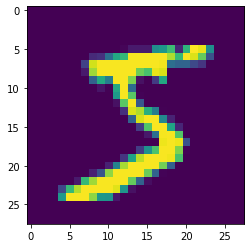

In [82]:
plt.imshow(x_train[0])
print(y_train[0])

In [83]:
#Implement MinMaxScaler
from keras.utils import to_categorical
x_train=x_train/255;
x_test=x_test/255;
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


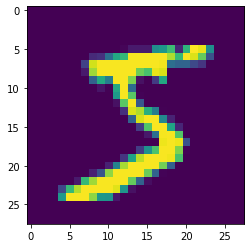

In [85]:
plt.imshow(x_train[0])
print(y_train[0])

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [87]:
model=Sequential([
    Conv2D(
        filters=32,
        kernel_size=(4,4),
        input_shape=(28,28,1),
        activation="relu"
    ),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(256,activation="relu"),
    Dense(10,activation="softmax")
])

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [88]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=20)

In [89]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[early_stop],epochs=100)

Epoch 1/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1252 - accuracy: 0.9621 - val_loss: 0.0530 - val_accuracy: 0.9846
Epoch 2/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0493 - val_accuracy: 0.9827
Epoch 3/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0403 - val_accuracy: 0.9863
Epoch 4/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0463 - val_accuracy: 0.9864
Epoch 5/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0124 - accuracy: 0.9957 - val_loss: 0.0401 - val_accuracy: 0.9882
Epoch 6/100
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0394 - val_accuracy: 0.9890
Epoch 7/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0

In [90]:
#Creating a plot for loss
__los__=pd.DataFrame(model.history.history)
__los__

,loss,accuracy,val_loss,val_accuracy
0,0.125183,0.962067,0.052962,0.9846
1,0.042151,0.986767,0.049322,0.9827
2,0.025834,0.991783,0.040282,0.9863
3,0.017845,0.994033,0.046284,0.9864
4,0.012445,0.995717,0.040125,0.9882
5,0.010068,0.996650,0.039356,0.9890
6,0.006514,0.997800,0.044972,0.9877
7,0.006436,0.997750,0.052254,0.9872
8,0.004908,0.998233,0.046901,0.9893
9,0.004279,0.998550,0.046444,0.9893


In [91]:
model.metrics_names

['loss', 'accuracy']

<AxesSubplot:>

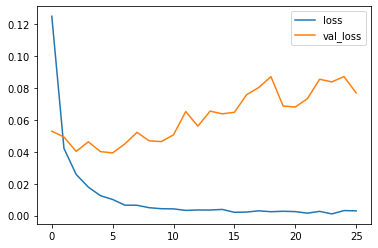

In [92]:
__los__[["loss","val_loss"]].plot()

<AxesSubplot:>

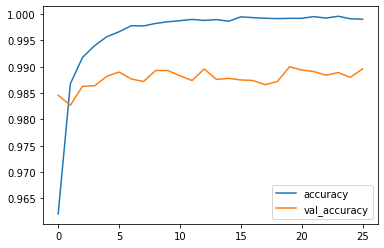

In [93]:
__los__[["accuracy","val_accuracy"]].plot()

In [94]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0770 - accuracy: 0.9896


[0.0769856721162796, 0.9896000027656555]

In [117]:
__pred__=model.predict(x_test)
__pred__

313/313 [==============================] - 2s 6ms/step


array([[5.8047650e-21, 3.5796396e-20, 2.0931243e-17, ..., 9.9999994e-01,
        4.6527266e-21, 1.2580137e-15],
       [1.3262824e-21, 5.6709957e-19, 9.9999994e-01, ..., 1.3682484e-27,
        1.4017244e-31, 4.2616107e-35],
       [1.6821917e-19, 9.9999994e-01, 2.4286317e-17, ..., 3.2800758e-14,
        9.9953415e-17, 3.8909670e-15],
       ...,
       [9.5567924e-29, 2.6047961e-17, 5.5021353e-28, ..., 1.1494351e-15,
        3.7083968e-16, 7.3700419e-18],
       [1.7843712e-17, 9.2118664e-24, 1.2403760e-25, ..., 1.7343005e-18,
        1.4158301e-10, 4.2583020e-17],
       [9.1768368e-22, 3.4056144e-23, 1.9427335e-24, ..., 1.9031925e-28,
        1.5060830e-21, 6.3979423e-29]], dtype=float32)

In [153]:
# for i in __pred__:
___pred___=pd.DataFrame(__pred__).apply(lambda x:to_categorical(np.argmax(x),num_classes=10),axis=1)   

In [154]:
___pred___

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
1       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
9995    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9996    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9997    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
9998    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
9999    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
Length: 10000, dtype: object

In [155]:
from sklearn.metrics import classification_report,confusion_matrix

10

In [161]:
print(classification_report(np.argmax(y_test,axis=1),np.argmax(__pred__,axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

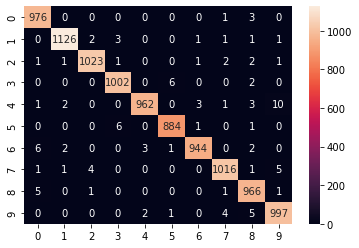

In [165]:
__confusion__=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(__pred__,axis=1))
sns.heatmap(__confusion__,annot=True,fmt="d") 
#

In [166]:
model.save('./MINST-MODEL-SAVED')

INFO:tensorflow:Assets written to: ./MINST-MODEL-SAVED\assets


INFO:tensorflow:Assets written to: ./MINST-MODEL-SAVED\assets
